# docs link
[link](https://github.com/JustGlowing/minisom/blob/master/minisom.py#LL467)

In [39]:
from minisom import MiniSom
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

In [40]:
data = load_wine()
x= data.data
y= data.target
print(x.shape)



(178, 13)


In [41]:
print(np.sqrt(178)*5)
#how to decide the x and y for the SOM output clusters. 178 is the number of rows in the dataset

66.70832032063167


In [42]:
xScaled = MinMaxScaler().fit_transform(x)

In [43]:
som = MiniSom(x=9, y=9, sigma=9,input_len=13, learning_rate=0.5)
# sigma is 'k', which is the neighbourhood spread
'''
x is the number of rows in output cluster
y is the number of columns in output cluster
input_len is the number of components of the input vector ie the number of features
'''

'\nx is the number of rows in output cluster\ny is the number of columns in output cluster\ninput_len is the number of components of the input vector ie the number of features\n'

In [44]:
som.random_weights_init(xScaled)
# assign random inputs as the weights of the NN
som.train_random(xScaled, 200)
# xScaled - data, 200 -> number of iterations

['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


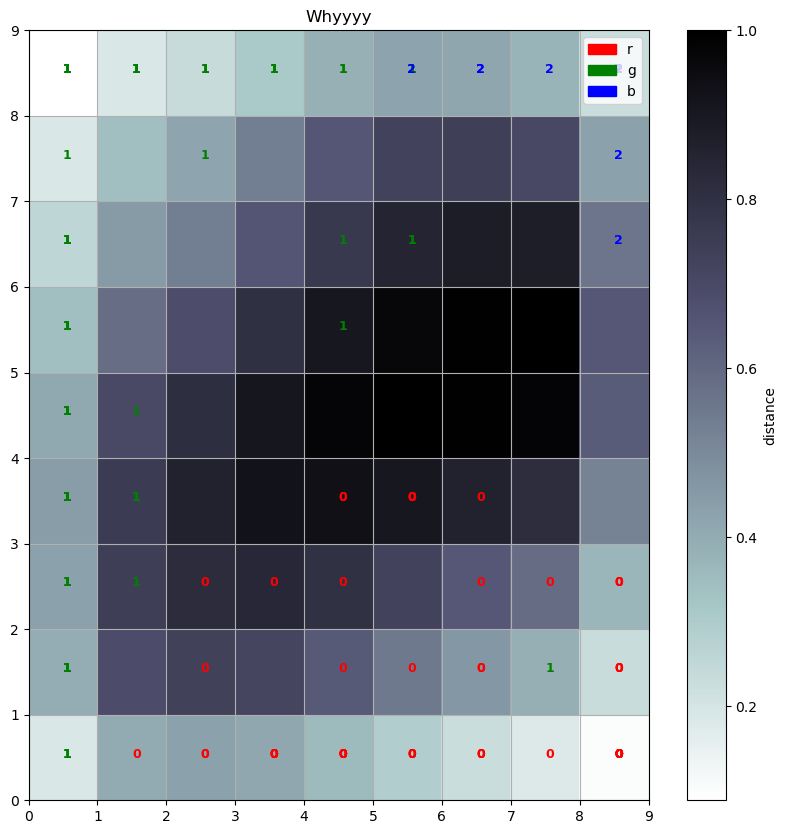

In [48]:
#plot the results
plt.figure(figsize=(10,10))

plt.pcolor(som.distance_map().T, cmap="bone_r")
plt.colorbar(label='distance')
colors =["r","g","b"]
labels = [colors[label] for label in y]
print(labels)

for i, x in enumerate(xScaled):
    winner = som.winner(x)
    plt.text(winner[0]+0.5, winner[1]+0.5, str(y[i]), color=labels[i], fontdict={"weight":"bold", "size":9})

legend = [Patch(color=c, label=colors[i]) for i, c in enumerate(colors)]
plt.legend(handles=legend, loc="upper right")
plt.title("Whyyyy")
plt.grid()

In [ ]:
# Kohonen self implementation

In [27]:
import random

noOfInputVecs = int(input("enter no of input vectors:"))
noOfInputComp = int(input("No of input vector components:"))
noOfOutputNeurons =int(input("Enter number of output neurons:"))
learningRate = float(input("Enter learning rate:"))
inputVecs=[]

for i in range(noOfInputVecs):
    temp=[]
    for j in range(noOfInputComp):
        temp.append(random.randint(0,1))
        
    inputVecs.append(temp)

inputVecs

enter no of input vectors: 4
No of input vector components: 4
Enter number of output neurons: 3
Enter learning rate: 1


[[0, 0, 1, 1], [1, 1, 1, 0], [1, 1, 1, 0], [1, 0, 1, 1]]

In [28]:
weights=[]
for i in range(noOfOutputNeurons):
    temp=[]
    for j in range(noOfInputComp):
        temp.append(round(random.random(),2))
    weights.append(temp)
weights

[[0.52, 0.92, 0.69, 0.1], [0.9, 0.31, 0.17, 0.75], [0.48, 0.57, 0.12, 0.22]]

In [29]:
#calculate distance ad select winning neuron
for ipv in inputVecs:
    print("Input vec:",ipv)
    print("Weights:", weights)
    distances=[]
    for w in weights:
        dist=0
        for idx,inputComp in enumerate(ipv):
            dist+=(inputComp-w[idx])**2
        distances.append(dist)
        
    #choose winning weights
    print("Distances:",distances)
    winningNeuron = min(distances)
    winningIdx = distances.index(winningNeuron)
    print("winning  Neuron and index:",winningNeuron, winningIdx)
    # update the weights of winningNeuron
    winningWeight = weights[winningIdx]
    print("Winning Weight",winningWeight)
    update =[]

    for idx in range(len(ipv)):
        update.append( learningRate*(ipv[idx] - winningWeight[idx]))
    
    for idx in range(len(update)):
        winningWeight[idx]+= update[idx]
        
    print("Updated weights:", weights)
    print()
    print()


Input vec: [0, 0, 1, 1]
Weights: [[0.52, 0.92, 0.69, 0.1], [0.9, 0.31, 0.17, 0.75], [0.48, 0.57, 0.12, 0.22]]
Distances: [2.0229, 1.6575, 1.9381]
winning  Neuron and index: 1.6575 1
Winning Weight [0.9, 0.31, 0.17, 0.75]
Updated weights: [[0.52, 0.92, 0.69, 0.1], [0.0, 0.0, 1.0, 1.0], [0.48, 0.57, 0.12, 0.22]]


Input vec: [1, 1, 1, 0]
Weights: [[0.52, 0.92, 0.69, 0.1], [0.0, 0.0, 1.0, 1.0], [0.48, 0.57, 0.12, 0.22]]
Distances: [0.34290000000000004, 3.0, 1.2781]
winning  Neuron and index: 0.34290000000000004 0
Winning Weight [0.52, 0.92, 0.69, 0.1]
Updated weights: [[1.0, 1.0, 1.0, 0.0], [0.0, 0.0, 1.0, 1.0], [0.48, 0.57, 0.12, 0.22]]


Input vec: [1, 1, 1, 0]
Weights: [[1.0, 1.0, 1.0, 0.0], [0.0, 0.0, 1.0, 1.0], [0.48, 0.57, 0.12, 0.22]]
Distances: [0.0, 3.0, 1.2781]
winning  Neuron and index: 0.0 0
Winning Weight [1.0, 1.0, 1.0, 0.0]
Updated weights: [[1.0, 1.0, 1.0, 0.0], [0.0, 0.0, 1.0, 1.0], [0.48, 0.57, 0.12, 0.22]]


Input vec: [1, 0, 1, 1]
Weights: [[1.0, 1.0, 1.0, 0.0], [0.0, 